## Inverse Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst
import scipy.special as spsp

### Example

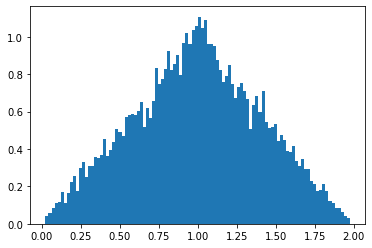

In [16]:
#f(x) = x from 0<=x<=1 (2-x) from 1<=x <= 2
#F(x) = x**2/2 form [0,1] 1-(2-x)**2/2
def sampling():
    U = np.random.rand()
    if U <= 0.5:
        return np.sqrt(2*U)
    else:
        return 2-np.sqrt(2*(1-U))
        
samples = [sampling() for i in range(10000)]
plt.hist(samples,density = True,bins = 100)
plt.show()

### Exponential Distribution

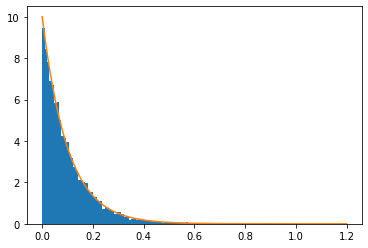

In [10]:
#Let x conforms to exp(lmbda)
#F(x) = 1 - exp(-lmbda*x)
def sampling(lmbda):
    return -np.log(np.random.rand())/lmbda

samples = [sampling(10) for i in range(10000)]
plt.hist(samples,density = True, bins = 100)
x = np.linspace(0,1.2,1000)
plt.plot(x,spst.expon.pdf(x,scale = 1/10))

### Gamma distribution (with n as an integer)

When n is an integer, Gamma distribution can be seen as the sum of n exponential distribution with lmbda

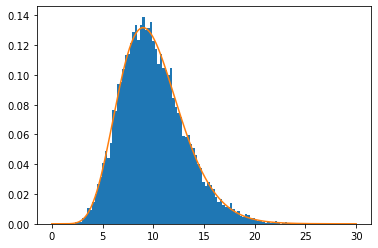

In [23]:
def sampling(lmbda,n):
    U = np.random.rand(n)
    x = -1/lmbda*np.log(np.product(U))
    return x

samples = [sampling(1,10) for i in range(10000)]
plt.hist(samples,density = True, bins = 100)
x = np.linspace(0,30,1000)
plt.plot(x,spst.gamma.pdf(x,10,scale = 1/1))
plt.show()
    

## Rejection Sampling

Step 1: Sample Y from Q. Sample uniform U.
Step 2: if U <= p(Y)/c/q(Y), return Y. else go back to step 1

It is worth noting that different from discrete rejection sampling, we need to differentiate oursevles to find max[f(x)/g(x)] to determine what c is.

### Example

In [26]:
#sample f(x) = 20x(1-x)**3 x from 0 to 1 
# We differentitate and find the c is f(0.25)
c = 20*0.25*(1-0.25)**3
def rejection_sampling():
    U = spst.uniform.rvs()
    Y = np.random.rand()
    while U > 20*Y*(1-Y)**3/c/1:
        U = spst.uniform.rvs()
        Y = np.random.rand()
    return Y

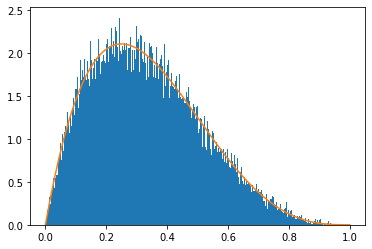

In [32]:
samples = [rejection_sampling() for i in range(100000)]
plt.hist(samples,density = True,bins = 1000)
x = np.linspace(0,1,1000)
plt.plot(x,20*x*(1-x)**3)
plt.show()

### Gamma Distribution (this time n is not integer, we call it alpha)

You are supposed to use beta = lmbda/alpha, and exponential distribution (beta) to rejection sample

In [43]:
def sample_gamma(alpha,lmbda):
    beta = lmbda/alpha
    c = alpha**alpha/spsp.gamma(alpha)*np.exp(1-alpha)
    U = spst.uniform.rvs()
    Y = spst.expon.rvs(scale = 1/beta)
    ratio = spst.gamma.pdf(Y,alpha,scale = 1/lmbda) / (c * spst.expon.pdf(Y,scale = 1/beta))
    while U > ratio:
        U = spst.uniform.rvs()
        Y = spst.expon.rvs(scale = 1/beta)
        ratio = spst.gamma.pdf(Y,alpha,scale = 1/lmbda) / (c * spst.expon.pdf(Y,scale = 1/beta))
    return Y


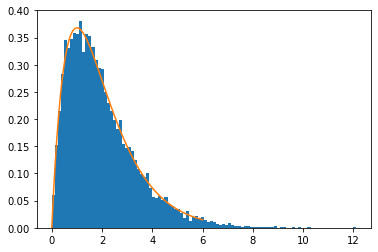

In [44]:
samples = [sample_gamma(2,1) for i in range(10000)]
plt.hist(samples,density = True,bins = 100)
x = np.linspace(0,6,1000)
plt.plot(x,spst.gamma.pdf(x,2,scale = 1))
plt.show()

### Normal Distribution

The way is sampe |z|, then using uniform to make it z, then shift it to the original normal distribution

The proposal distribution would be exp(1)

c = 2/sqrt(2pi)*exp(1/2)

In [56]:
def sample_z():
    U = spst.uniform.rvs()
    Y = spst.expon.rvs(scale = 1/1)
    while U > np.exp(-(Y-1)**2/2):
        U = spst.uniform.rvs()
        Y = spst.expon.rvs(scale = 1/1)
    U = np.random.rand()
    if U < 1/2:
        return -Y
    else:
        return Y

    

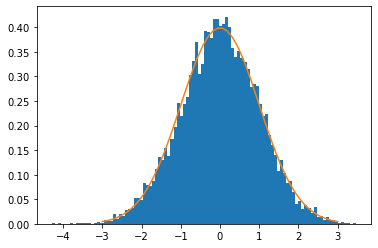

In [59]:
samples = [sample_z() for i in range(10000)]
plt.hist(samples,density = True,bins = 100)
x = np.linspace(-3,3)
plt.plot(x,spst.norm.pdf(x))
plt.show()